In [52]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np
import math

results_path = './results/session2/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp','V','E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,BVZ-tsukuba0,parallelbcsr,5.416512,3517.507324,3522.923828,20240920164937,110594,293971
1,BVZ-tsukuba0,parallelbcsr,3.720800,3479.440674,3483.161377,20240920171434,110594,293971
2,BVZ-tsukuba0,parallelbcsr,3.871104,3493.287598,3497.158691,20240920173930,110594,293971
3,BVZ-tsukuba0,parallelbcsr,4.013824,3495.207520,3499.221191,20240920180429,110594,293971
4,BVZ-tsukuba0,parallelbcsr,3.875840,3493.416260,3497.292236,20240920182930,110594,293971
...,...,...,...,...,...,...,...,...
485,graph9b,parallelbcsr,3.855552,95.931389,99.786942,20240920191732,100000,1152482
486,graph9b,parallelbcsr,3.922880,97.037117,100.959999,20240920194233,100000,1152482
487,graph9b,parallelbcsr,6.074912,97.917152,103.992065,20240920200734,100000,1152482
488,graph9b,parallelbcsr,3.948352,91.790588,95.738945,20240920203235,100000,1152482


In [53]:
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,BVZ-tsukuba0,parallelbcsr,110594,293971,4.514826,0.806368,3.720800,5.522624,3486.942969,15.033128,3466.776123,3517.507324,3491.457788,15.076218,3472.213135,3522.923828
1,BVZ-tsukuba1,parallelbcsr,110594,305701,4.108029,0.698089,3.691328,5.460384,3678.831372,349.646136,3455.711914,4597.324707,3682.939380,349.539743,3459.473633,4601.141602
2,BVZ-tsukuba10,parallelbcsr,110594,296017,4.161139,0.706349,3.653536,5.497440,3658.547314,112.434353,3535.202393,3804.408691,3662.708423,112.572013,3538.995605,3808.062256
3,BVZ-tsukuba11,parallelbcsr,110594,289934,4.001104,0.519613,3.744192,5.456128,3933.725342,63.827077,3803.489502,3999.172119,3937.726416,63.869265,3807.358887,4003.017334
4,BVZ-tsukuba12,parallelbcsr,110594,290304,4.573846,0.949251,3.828192,6.062048,3810.436914,14.169944,3782.019531,3830.509033,3815.010718,13.822756,3788.081543,3834.337158
5,BVZ-tsukuba13,parallelbcsr,110594,331104,3.373491,0.668204,2.699104,4.438528,0.350278,0.045939,0.298496,0.399712,3.723770,0.712937,2.997600,4.838240
6,BVZ-tsukuba14,parallelbcsr,110594,294803,4.773818,0.964088,3.797792,6.197056,3639.133594,53.671736,3606.175781,3781.904541,3643.907422,53.569007,3610.073730,3785.858643
7,BVZ-tsukuba15,parallelbcsr,110594,298482,4.822362,0.915312,3.847904,5.698176,3750.144043,14.621776,3732.926758,3777.403076,3754.966431,15.098022,3736.862549,3783.083252
8,BVZ-tsukuba2,parallelbcsr,110594,287760,4.329808,0.876472,3.691424,5.969216,3612.627686,22.016449,3581.944092,3651.576904,3616.957495,21.905553,3587.290527,3656.986084
9,BVZ-tsukuba3,parallelbcsr,110594,286209,4.356698,0.868881,3.687040,5.957120,3778.062598,18.242281,3748.111084,3803.794922,3782.419312,18.141931,3751.914551,3807.789307


In [54]:
agg_results = agg_results.sort_values(by=['V'])
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
18,graph1,serial,4,5,0.005900,0.003665,0.002000,0.011000,0.005100,0.003348,0.002000,0.010000,0.011400,0.006867,0.005000,0.021000
17,graph1,parallelbcsr,4,5,0.144534,0.025896,0.110496,0.189120,1.644317,0.295917,1.313024,2.114496,1.788851,0.315733,1.423520,2.272192
16,graph1,parallel,4,5,0.132042,0.026573,0.096480,0.179264,0.289078,0.065177,0.196320,0.366112,0.421120,0.090565,0.292800,0.539232
21,graph2,serial,6,8,0.006600,0.004477,0.002000,0.013000,0.009200,0.006321,0.003000,0.018000,0.016300,0.010719,0.006000,0.031000
20,graph2,parallelbcsr,6,8,0.149664,0.020116,0.106848,0.168288,1.668621,0.287864,1.044000,1.890784,1.818285,0.298463,1.150848,2.057184
19,graph2,parallel,6,8,0.139914,0.026654,0.099136,0.171584,0.247802,0.060855,0.171456,0.317664,0.387715,0.087220,0.270592,0.487648
24,graph3,serial,100,459,0.036000,0.003887,0.025000,0.038000,10.846400,0.902966,8.279000,11.182000,10.882900,0.906984,8.304000,11.220000
27,graph3b,serial,100,918,0.035900,0.003900,0.026000,0.041000,1.055200,0.087495,0.812000,1.113000,1.091400,0.090897,0.839000,1.155000
26,graph3b,parallelbcsr,100,459,0.151242,0.078187,0.112896,0.372736,2.037891,2.129341,1.338304,8.097920,2.189133,2.207161,1.463776,8.470656
25,graph3b,parallel,100,918,0.203280,0.034003,0.165376,0.255392,0.726432,0.083681,0.560032,0.844192,0.929712,0.108959,0.727968,1.084960


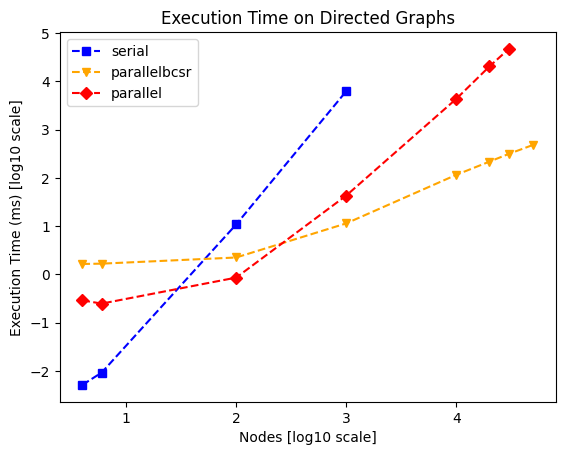

In [73]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsr': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and not contains 'tsukuba'
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]

# Line plot
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
plt.legend()
#plt.xticks(rotation=45)
plt.show()

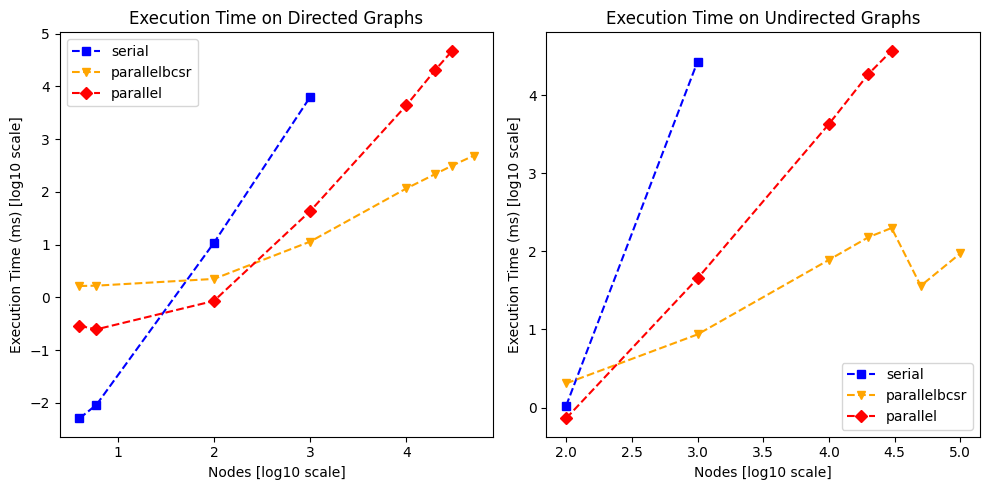

In [76]:
# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and plot execution time for each algorithm on undirected graphs (graphId ends with 'b') 
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]
agg_results_undirected = agg_results[agg_results['graphId'].str.endswith('b')]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
plt.legend()
#plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
for algorithm in agg_results_undirected['algorithm'].unique():
    data = agg_results_undirected[agg_results_undirected['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Undirected Graphs')
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


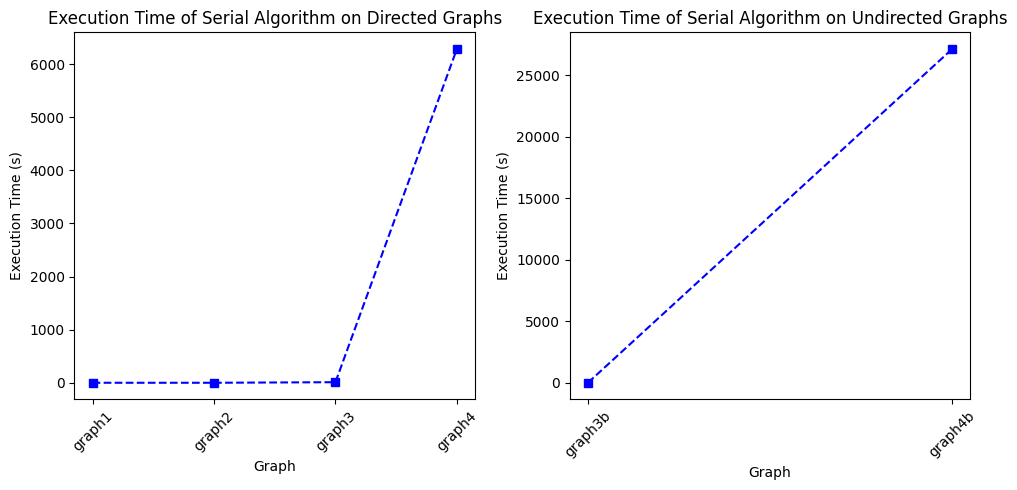

In [37]:
# Plot execution time of serial algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

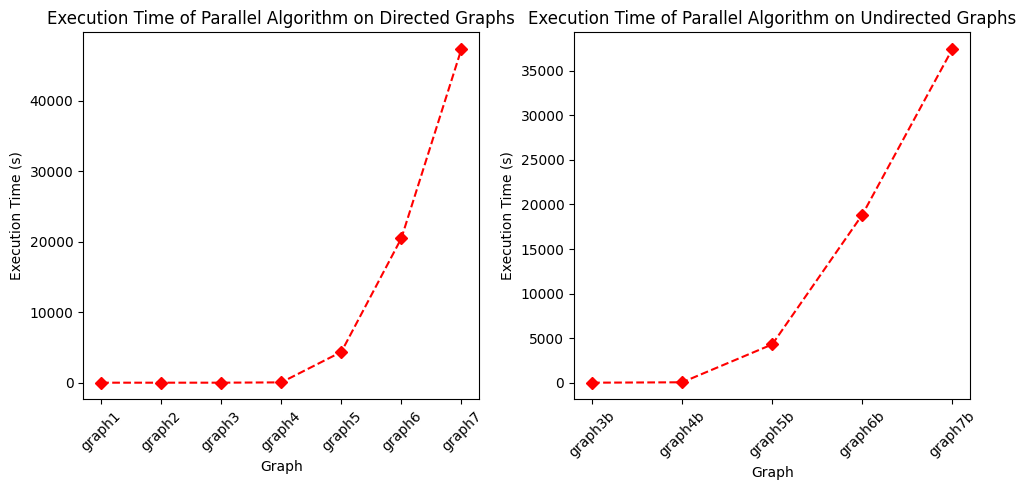

In [38]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

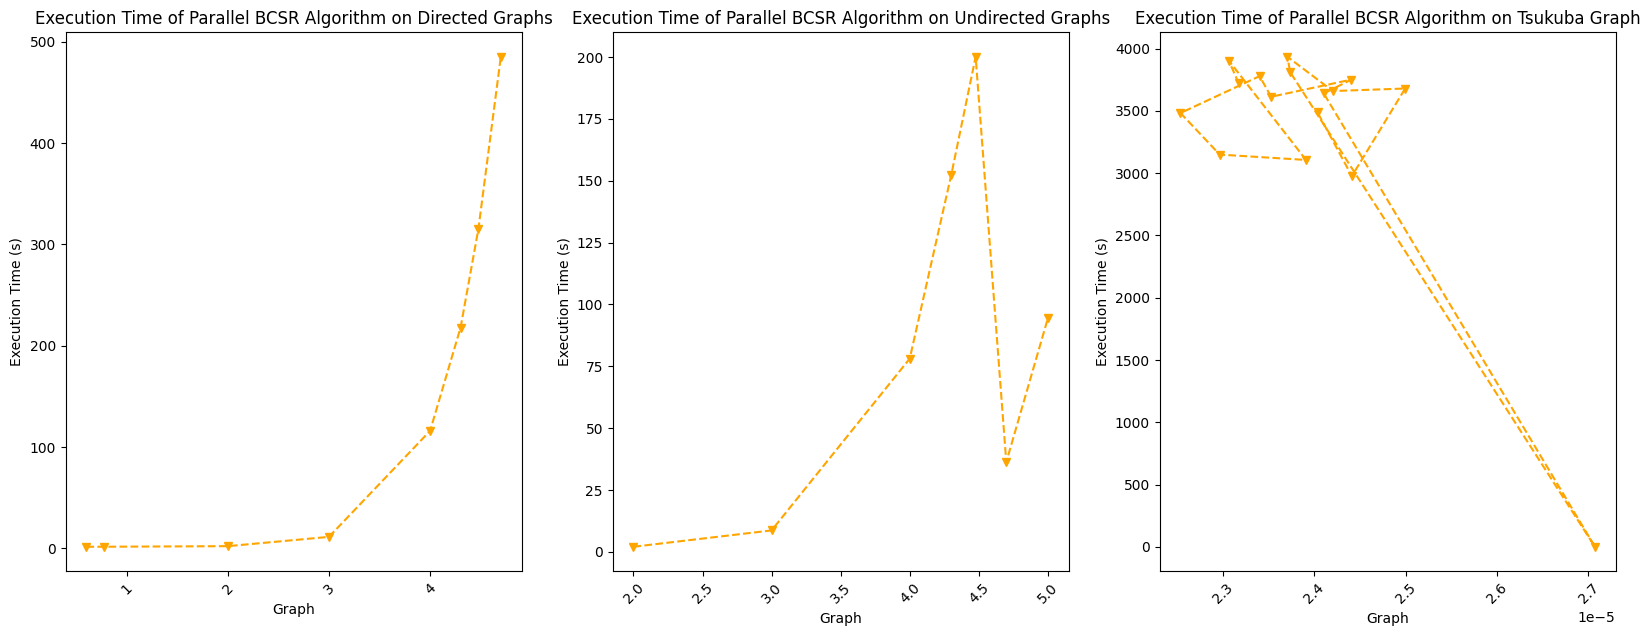

In [87]:
# Plot execution time of parallelbcsr algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (~agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_directed_tsukuba = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (agg_results['graphId'].str.contains('tsukuba'))]
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.plot(np.log10(agg_results_directed['V']), agg_results_directed['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
plt.plot(np.log10(agg_results_undirected['V']), agg_results_undirected['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
density = agg_results_directed_tsukuba['E'] / (agg_results_directed_tsukuba['V'] * (agg_results_directed_tsukuba['V'] -1))
plt.plot(density, agg_results_directed_tsukuba['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Tsukuba Graph')
plt.xticks(rotation=45)
plt.show()

In [92]:
results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp', 'V', 'E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,graphP01,parallelbcsr,22.615904,1546.036987,1568.652954,20240924154429,10000,9500342
1,graphP01,parallel,553.705750,5189.589355,5743.294922,20240924153741,10000,9999757
2,graphP02,parallelbcsr,42.545151,3666.749512,3709.294678,20240924155146,10000,17995211
3,graphP02,parallel,683.767334,5832.349121,6516.116699,20240924153756,10000,19993722
4,graphP03,parallel,808.927917,6186.833008,6995.760742,20240924153815,10000,29993721
5,graphP04,parallel,947.068237,6495.561523,7442.629883,20240924153838,10000,39990795
6,graphP05,parallel,1034.319580,6628.066406,7662.385742,20240924153904,10000,49990079
7,graphP06,parallel,964.412537,6702.470703,7666.883301,20240924153934,10000,59987114
8,graphP07,parallel,826.587524,6558.506836,7385.094238,20240924154008,10000,69987429
9,graphP08,parallel,699.877502,5613.668945,6313.546387,20240924154044,10000,79992336


In [93]:
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,graphP01,parallel,10000,9999757,553.705750,NaN,553.705750,553.705750,5189.589355,NaN,5189.589355,5189.589355,5743.294922,NaN,5743.294922,5743.294922
1,graphP01,parallelbcsr,10000,9500342,22.615904,NaN,22.615904,22.615904,1546.036987,NaN,1546.036987,1546.036987,1568.652954,NaN,1568.652954,1568.652954
2,graphP02,parallel,10000,19993722,683.767334,NaN,683.767334,683.767334,5832.349121,NaN,5832.349121,5832.349121,6516.116699,NaN,6516.116699,6516.116699
3,graphP02,parallelbcsr,10000,17995211,42.545151,NaN,42.545151,42.545151,3666.749512,NaN,3666.749512,3666.749512,3709.294678,NaN,3709.294678,3709.294678
4,graphP03,parallel,10000,29993721,808.927917,NaN,808.927917,808.927917,6186.833008,NaN,6186.833008,6186.833008,6995.760742,NaN,6995.760742,6995.760742
5,graphP04,parallel,10000,39990795,947.068237,NaN,947.068237,947.068237,6495.561523,NaN,6495.561523,6495.561523,7442.629883,NaN,7442.629883,7442.629883
6,graphP05,parallel,10000,49990079,1034.319580,NaN,1034.319580,1034.319580,6628.066406,NaN,6628.066406,6628.066406,7662.385742,NaN,7662.385742,7662.385742
7,graphP06,parallel,10000,59987114,964.412537,NaN,964.412537,964.412537,6702.470703,NaN,6702.470703,6702.470703,7666.883301,NaN,7666.883301,7666.883301
8,graphP07,parallel,10000,69987429,826.587524,NaN,826.587524,826.587524,6558.506836,NaN,6558.506836,6558.506836,7385.094238,NaN,7385.094238,7385.094238
9,graphP08,parallel,10000,79992336,699.877502,NaN,699.877502,699.877502,5613.668945,NaN,5613.668945,5613.668945,6313.546387,NaN,6313.546387,6313.546387


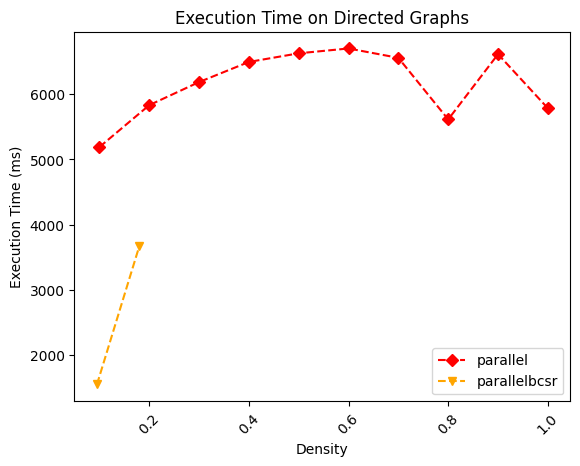

In [97]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsr': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

# Line plot
for algorithm in agg_results['algorithm'].unique():
    data = agg_results[agg_results['algorithm'] == algorithm]
    density = data['E'] / (data['V'] * (data['V'] -1))
    plt.plot(density, data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Density')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time on Directed Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.show()